In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

170498071/170498071 [==============================] - 15s 0us/step
[6]


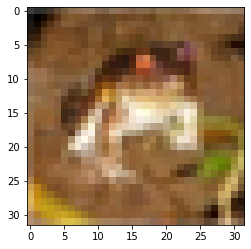

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
print(train_labels[0])
plt.imshow(train_images[0])
plt.show()

train_data = tf.data.Dataset.from_tensor_slices(
    (train_images.astype(np.float32) / 255, train_labels.reshape(-1).astype(np.int32)))
train_data = train_data.shuffle(buffer_size=60000).batch(128).repeat(2)

test_data = tf.data.Dataset.from_tensor_slices(
    (test_images.astype(np.float32) / 255, test_labels.reshape(-1).astype(np.int32))).batch(128).repeat(2)

In [ ]:
def composite_function(inputs,n_filters):
  batc_norm = tf.keras.layers.BatchNormalization() (inputs)
  Conv2D_3_3 = tf.keras.layers.Conv2D(n_filters, kernel_size=(3, 3),padding="same", activation='relu')(batc_norm)
  # x = tf.keras.layers.Dropout(rate=0.30)(Conv2D_3_3) 
  return Conv2D_3_3

def transition_layer(inputs, n_filters):
  # ommited the 1x1 convolution
  # ommited batch_normalization in transition layer
    output = tf.keras.layers.AveragePooling2D(pool_size=(2,2))(inputs)
    return output

def dense_block(inputs, num_layer_per_dense_block, n_filters, growth_rate):
    outputs_seen = []
    outputs_seen.append(inputs)
    # n_filters = n_filters
    for i in range(num_layer_per_dense_block):
        int_outputs = composite_function(inputs, n_filters)
        outputs_seen.append(int_outputs)
        inputs = tf.keras.layers.Concatenate()(outputs_seen)
        n_filters = 16 + growth_rate*n_filters # To increase the number of filters for each layer.
    return inputs, n_filters


# def dense_block(inputs, num_layer_per_dense_block, n_filters, growth_rate):
#     outputs_seen = []
#     for i in range(num_layer_per_dense_block):
#         int_outputs = composite_function(inputs, n_filters)
#         outputs_seen.append(int_outputs)
#         inputs = tf.keras.layers.Concatenate()(outputs_seen)
#         n_filters = 16 + growth_rate*n_filters # To increase the number of filters for each layer.
#     return inputs, n_filters


def DenseNet (inputs_shape,n_dense_blocks,num_layer_per_dense_block,n_filters, growth_rate,model_name):
  inputs = tf.keras.layers.Input(shape=inputs_shape)
  x = tf.keras.layers.Conv2D(16 , kernel_size=(3,3),padding="same", activation = 'relu')(inputs)
  # x = tf.keras.layers.MaxPool2D(pool_size = (3,3), padding='same')(x)

  for i in range(n_dense_blocks):
    x, n_filters = dense_block(x, num_layer_per_dense_block , n_filters, growth_rate )
    x = transition_layer(x, n_filters)
  
  flattened_output = tf.keras.layers.GlobalAveragePooling2D()(x)
  flattened_output = tf.keras.layers.Dropout(rate=0.30)(flattened_output)
  logits = tf.keras.layers.Dense(10)( flattened_output ) 
  model = tf.keras.models.Model( inputs , logits, name = model_name)
  return model



In [ ]:
optimizer = tf.optimizers.Adam()
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

# Prepare the metrics.
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

DM1 = DenseNet(inputs_shape = ( 32 , 32 , 3 ),
                          n_dense_blocks = 2,
                          num_layer_per_dense_block = 3,
                          growth_rate = 2,
                          n_filters = 8,
                          model_name = 'DM_1')
tf.config.run_functions_eagerly(False)
DM1.compile(optimizer,loss=loss_fn,metrics=train_acc_metric)
start = time.time()
DM1.fit(train_data,epochs=5,validation_data=test_data)
stop = time.time()

print("Total Time is:", stop-start )


Epoch 1/5
782/782 [==============================] - 129s 150ms/step - loss: 1.1091 - sparse_categorical_accuracy: 0.6110 - val_loss: 0.8440 - val_sparse_categorical_accuracy: 0.7078
Epoch 2/5
782/782 [==============================] - 117s 150ms/step - loss: 0.5259 - sparse_categorical_accuracy: 0.8180 - val_loss: 0.7405 - val_sparse_categorical_accuracy: 0.7585
Epoch 3/5
782/782 [==============================] - 118s 151ms/step - loss: 0.3055 - sparse_categorical_accuracy: 0.8936 - val_loss: 0.6605 - val_sparse_categorical_accuracy: 0.8057
Epoch 4/5
782/782 [==============================] - 118s 151ms/step - loss: 0.1718 - sparse_categorical_accuracy: 0.9400 - val_loss: 0.6804 - val_sparse_categorical_accuracy: 0.8111
Epoch 5/5
782/782 [==============================] - 118s 151ms/step - loss: 0.1018 - sparse_categorical_accuracy: 0.9646 - val_loss: 0.7783 - val_sparse_categorical_accuracy: 0.8095
Total Time is: 615.2269871234894


In [ ]:
optimizer = tf.optimizers.Adam()
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

# Prepare the metrics.
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

DM2 = DenseNet(inputs_shape = ( 32 , 32 , 3 ),
                          n_dense_blocks = 2,
                          num_layer_per_dense_block = 3,
                          growth_rate = 2,
                          n_filters = 16,
                          model_name = 'DM_2')
tf.config.run_functions_eagerly(False)

DM2.compile(optimizer,loss=loss_fn,metrics=train_acc_metric)
start = time.time()
DM2.fit(train_data,epochs=5,validation_data=test_data)
stop = time.time()

print("Total Time is:", stop-start )

Epoch 1/5
782/782 [==============================] - 215s 266ms/step - loss: 1.0941 - sparse_categorical_accuracy: 0.6240 - val_loss: 0.9685 - val_sparse_categorical_accuracy: 0.6637
Epoch 2/5
782/782 [==============================] - 199s 254ms/step - loss: 0.4856 - sparse_categorical_accuracy: 0.8324 - val_loss: 0.7742 - val_sparse_categorical_accuracy: 0.7591
Epoch 3/5
782/782 [==============================] - 198s 253ms/step - loss: 0.2574 - sparse_categorical_accuracy: 0.9103 - val_loss: 0.5389 - val_sparse_categorical_accuracy: 0.8327
Epoch 4/5
782/782 [==============================] - 197s 252ms/step - loss: 0.1401 - sparse_categorical_accuracy: 0.9509 - val_loss: 0.8397 - val_sparse_categorical_accuracy: 0.7714
Epoch 5/5
782/782 [==============================] - 197s 251ms/step - loss: 0.0918 - sparse_categorical_accuracy: 0.9687 - val_loss: 0.7938 - val_sparse_categorical_accuracy: 0.8177
Total Time is: 1019.7935552597046


Model: "DM_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 16)   448         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 16)  64          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 conv2d_1 (Conv2D)              (None, 32, 32, 8)    1160        ['batch_normalization[0][0]'] 

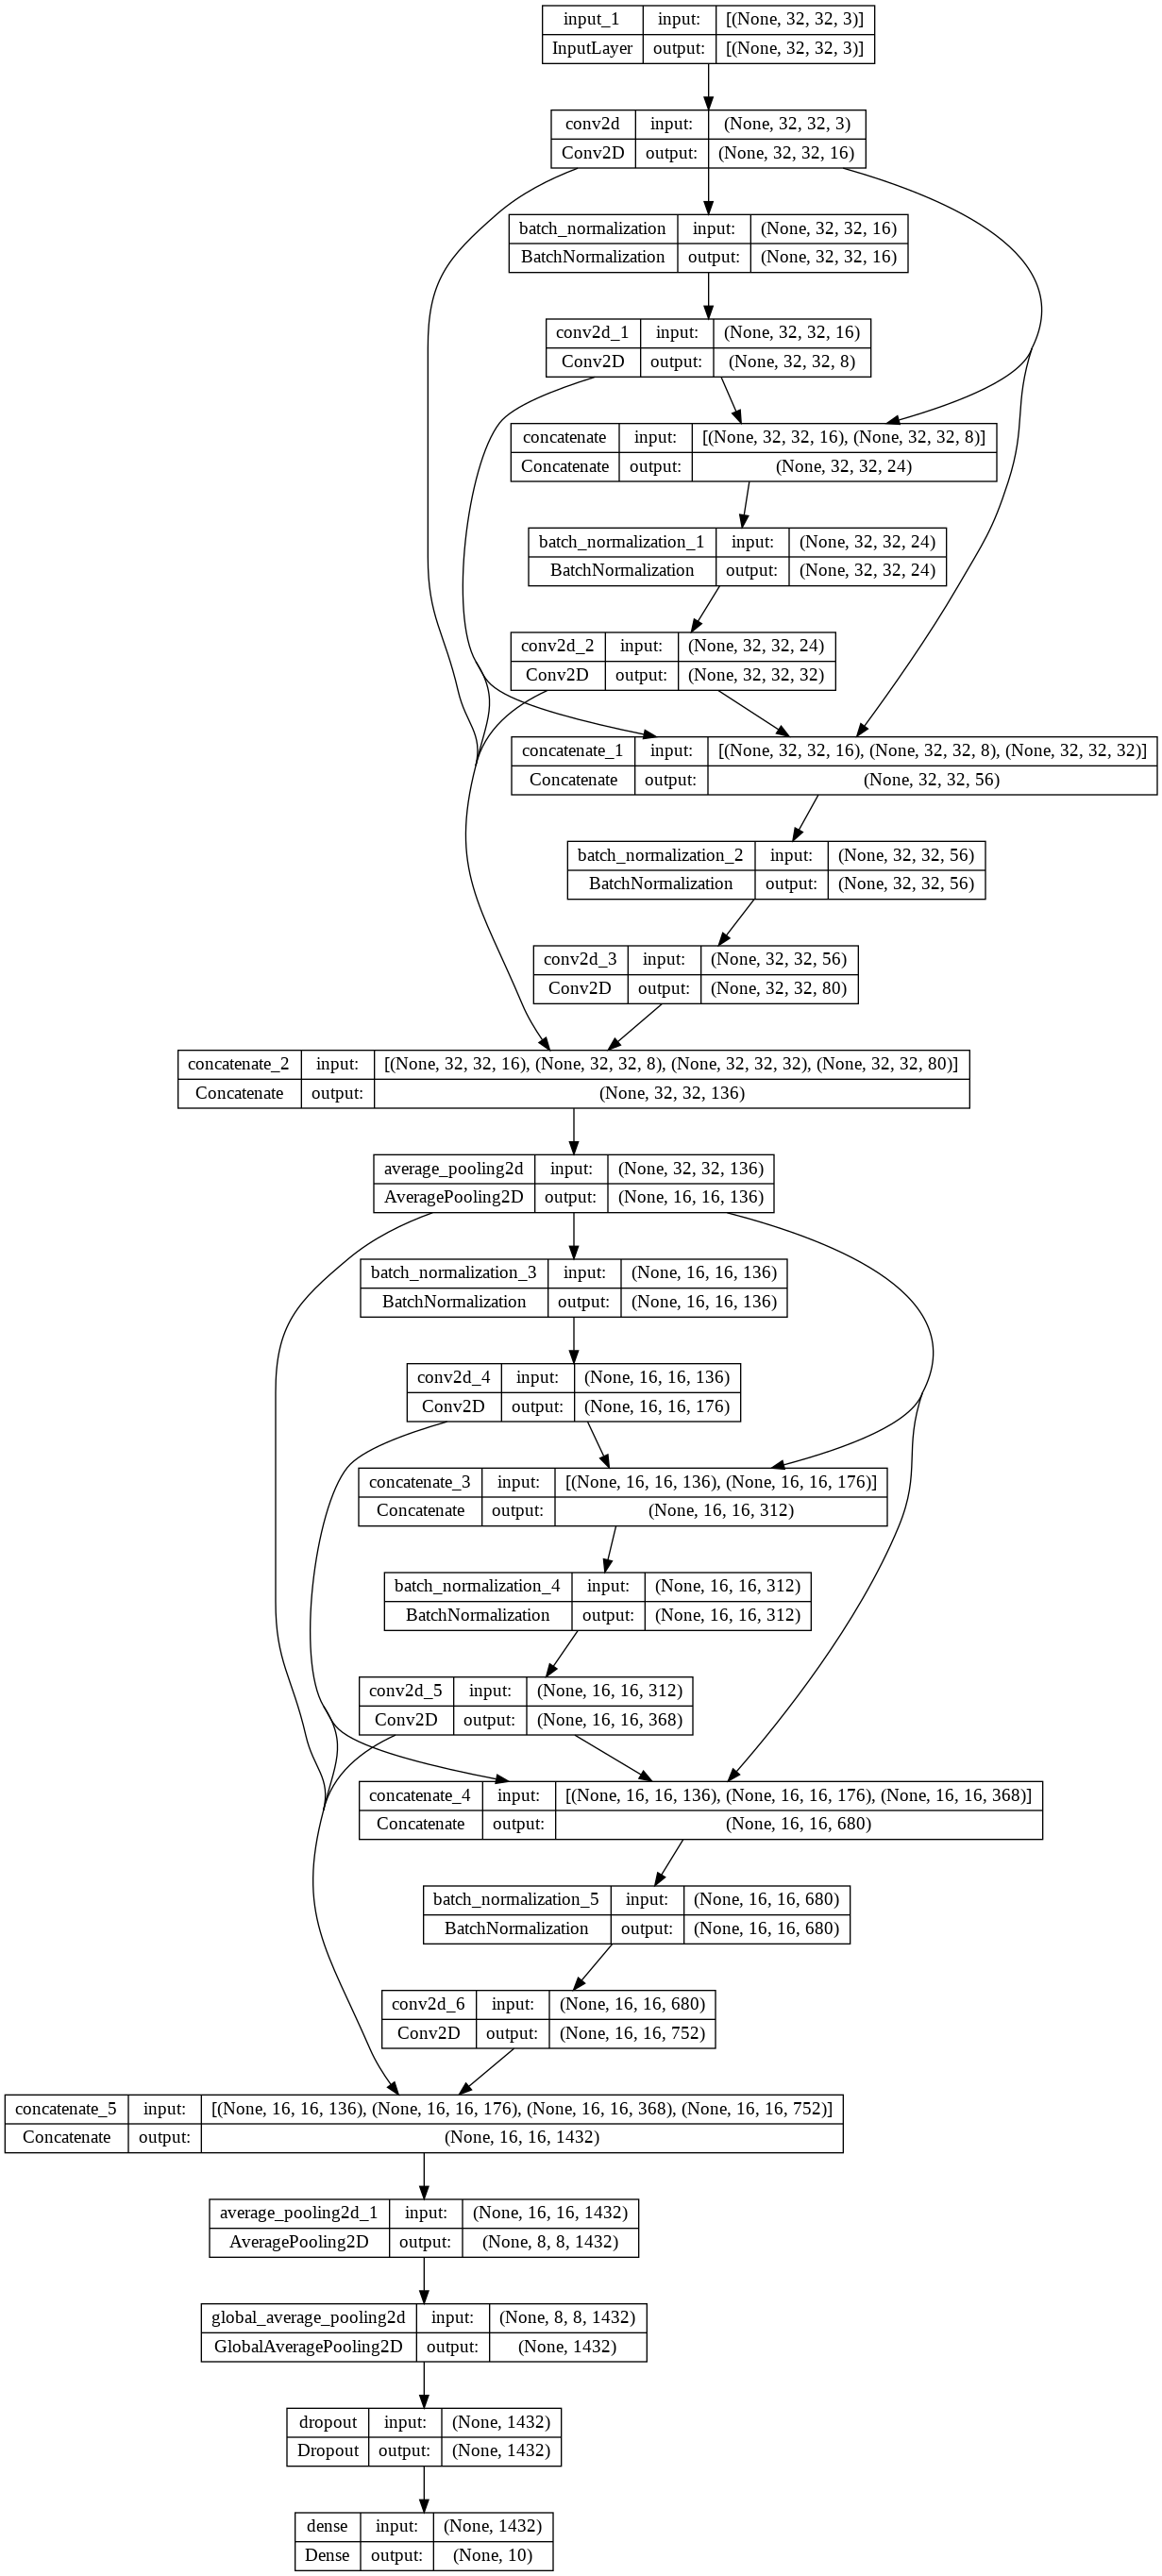

In [ ]:
DM1.summary()
tf.keras.utils.plot_model(DM1 , show_shapes=True )

Model: "DM_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_7 (Conv2D)              (None, 32, 32, 16)   448         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_6 (BatchNo  (None, 32, 32, 16)  64          ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 conv2d_8 (Conv2D)              (None, 32, 32, 16)   2320        ['batch_normalization_6[0][0]'

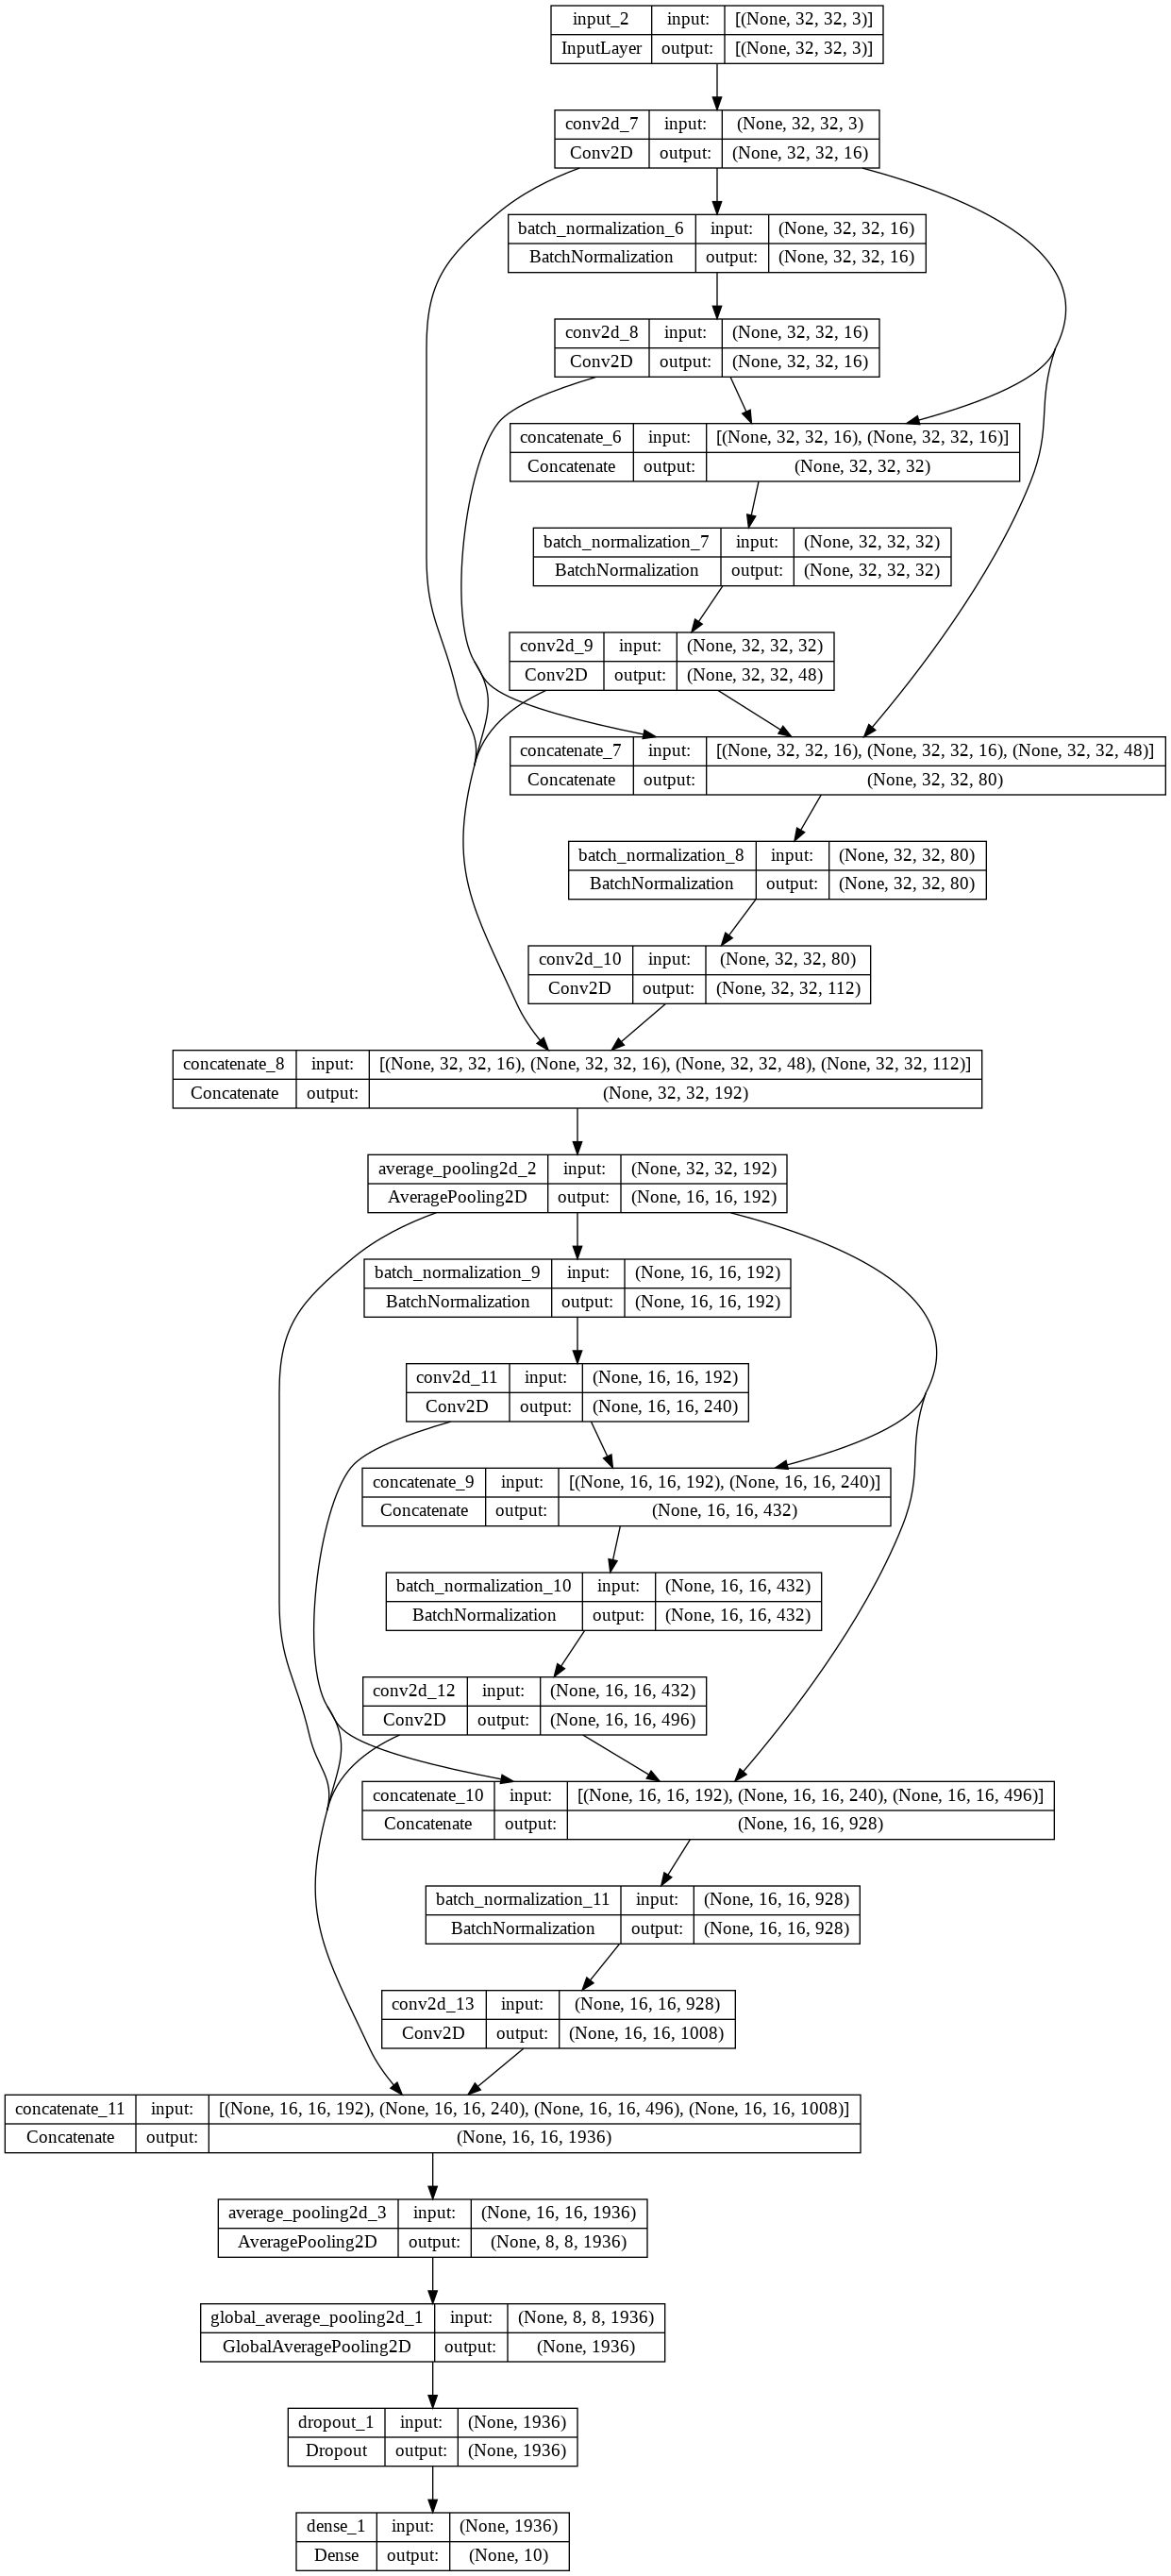

In [ ]:
DM2.summary()
tf.keras.utils.plot_model(DM2 , show_shapes=True )


# Without Graph Based Execution

In [ ]:
optimizer = tf.optimizers.Adam()
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

# Prepare the metrics.
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

DM1 = DenseNet(inputs_shape = ( 32 , 32 , 3 ),
                          n_dense_blocks = 2,
                          num_layer_per_dense_block = 3,
                          growth_rate = 2,
                          n_filters = 8,
                          model_name = 'DM_1')
tf.config.run_functions_eagerly(True)

DM1.compile(optimizer,loss=loss_fn,metrics=train_acc_metric)
start = time.time()
DM1.fit(train_data,epochs=5,validation_data=test_data)
stop = time.time()

print("Total Time is:", stop-start )

Epoch 1/5
782/782 [==============================] - 150s 192ms/step - loss: 1.0802 - sparse_categorical_accuracy: 0.6216 - val_loss: 0.7274 - val_sparse_categorical_accuracy: 0.7534
Epoch 2/5
782/782 [==============================] - 149s 190ms/step - loss: 0.5203 - sparse_categorical_accuracy: 0.8204 - val_loss: 0.5769 - val_sparse_categorical_accuracy: 0.8087
Epoch 3/5
782/782 [==============================] - 148s 190ms/step - loss: 0.3029 - sparse_categorical_accuracy: 0.8944 - val_loss: 0.5921 - val_sparse_categorical_accuracy: 0.8086
Epoch 4/5
782/782 [==============================] - 144s 184ms/step - loss: 0.1704 - sparse_categorical_accuracy: 0.9403 - val_loss: 0.7494 - val_sparse_categorical_accuracy: 0.8056
Epoch 5/5
782/782 [==============================] - 147s 188ms/step - loss: 0.1036 - sparse_categorical_accuracy: 0.9636 - val_loss: 0.8879 - val_sparse_categorical_accuracy: 0.8014
Total Time is: 791.8264937400818
